# House Prediction Model


### This model predict the pricing of a house on the basis of other parameters of that area.


In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

In [2]:
# load dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
data = pd.read_csv(data_url, skiprows=22, header=None, delim_whitespace=True)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [4]:
features = np.hstack([data.values[::2, :], data.values[1::2, :2]])

In [5]:
target = data.values[1::2, 2:3]

In [6]:
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

In [7]:
boston = pd.DataFrame(features, columns=feature_names)

In [8]:
boston["PRICE"] = target

In [9]:
# loading 5 columns of boston dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Information about boston dataset


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Information about all columns

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population


### Summary table of all the columns

| Feature | Impact on price | Reason                                              |
| ------- | --------------- | --------------------------------------------------- |
| CRIM    | Negative        | Higher Crime Rate lower demands of house            |
| ZN      | Positive        | Larger residental plots increase the price of house |
| INDUS   | Negative        |
| CHAS    | Positive        |
| NOX     | Negative        |
| RM      | Positive        |
| AGE     | Negative        |
| DIS     | Negative        |
| RAD     | Mixed           |
| TAX     | Negative        |
| PTRATIO | Negative        |
| B       | Positive        |
| LSTAT   | Negative        |


In [11]:
# Summary of dataset
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Finding missing values


In [12]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

There is no missing values in dataset.


### EDA


In [13]:
# Correlation
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

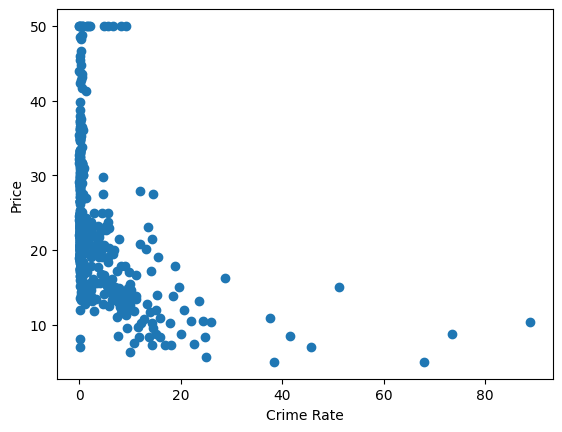

In [14]:
plt.scatter(boston['CRIM'], boston['PRICE'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

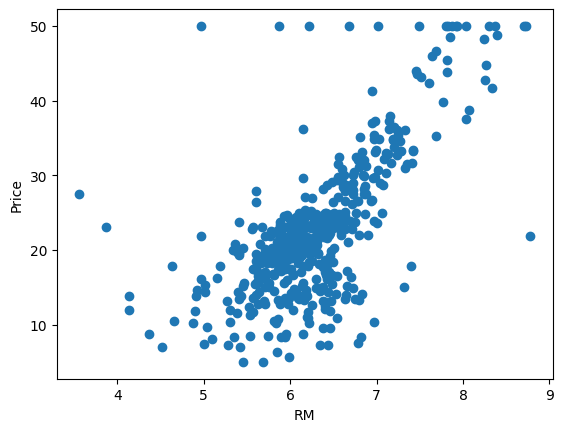

In [15]:
plt.scatter(boston['RM'], boston['PRICE'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='PRICE'>

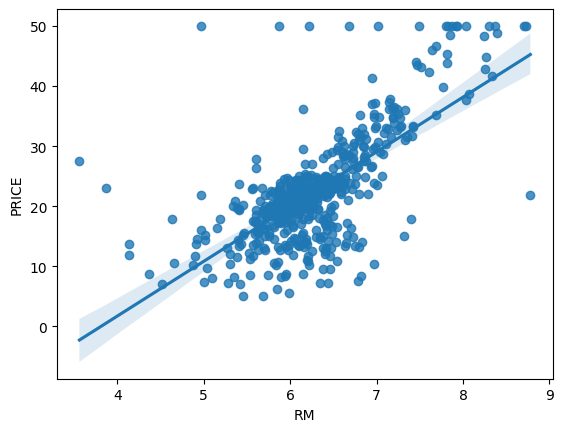

In [16]:
sns.regplot(x="RM", y="PRICE", data=boston)

<Axes: xlabel='LSTAT', ylabel='PRICE'>

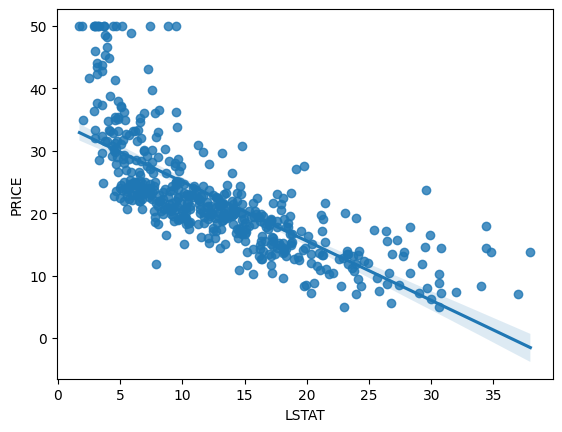

In [17]:
sns.regplot(x="LSTAT", y="PRICE", data=boston)

<Axes: xlabel='CHAS', ylabel='PRICE'>

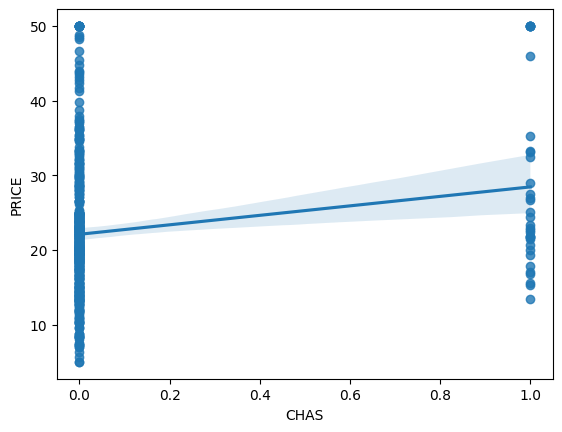

In [18]:
sns.regplot(x="CHAS", y="PRICE", data=boston)

<Axes: xlabel='PTRATIO', ylabel='PRICE'>

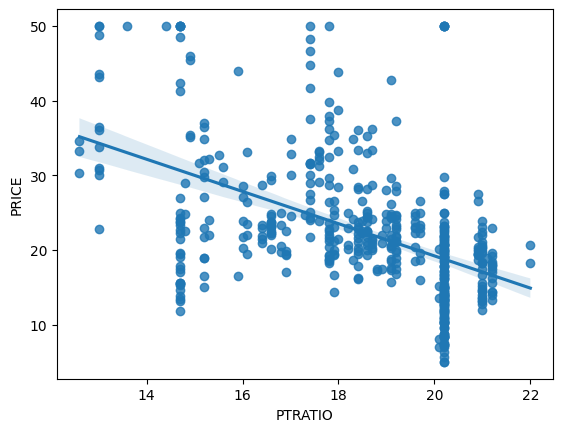

In [19]:
sns.regplot(x="PTRATIO", y="PRICE", data=boston)

- Dependent features and independent features


In [20]:
X = boston.iloc[:,:-1]
Y = boston.iloc[:,-1]

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [23]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=60)

In [24]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
83,0.03551,25.0,4.86,0.0,0.426,6.167,46.7,5.4007,4.0,281.0,19.0,390.64,7.51
339,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
427,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
326,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97
394,13.35980,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24.0,666.0,20.2,396.90,16.35
70,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67


In [25]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16
303,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99


- Standarise the dataset


In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [49]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### Training the model


In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, Y_train)

LinearRegression()

In [31]:
# coefficients
print(lr.coef_)

[-0.88812611  0.62756059  0.30864003  0.81761542 -1.79962845  3.10015421
  0.15834108 -2.55925064  2.46149305 -1.8878     -1.9049631   1.16683756
 -3.76411352]


In [32]:
# intercept
print(lr.intercept_)

22.531920903954795


In [33]:
# parameters that used to train model
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Prediction with test data


In [34]:
lr_pred = lr.predict(X_test)

In [35]:
lr_pred

array([13.09182632, 33.7226761 , 22.59349788, 19.57698822, 30.98821357,
       20.32605777, 11.15207565, 27.99693151, 16.26158275, 21.9849728 ,
       14.19175967, 32.4160147 , 23.3696092 , 27.1803347 , 27.36664181,
       25.99719046, 21.7696467 , 19.90252595, 31.31601066, 20.64273166,
       19.66816557, 26.36765065, 26.3818698 , 30.93005339, 23.83941822,
       22.20455726, 33.35713352, 17.64891462, 14.94751297, 31.49924459,
        8.48705504, 17.4341749 , 22.80913216, 16.12955591, 19.504124  ,
        5.93362855, 26.76440014, 13.13170481, 20.87151195, 22.97326637,
       19.56932537, 27.43148393, 28.76699181, 19.78368417, 28.3911681 ,
       19.04120799, 27.08216838, 16.94208058, 29.99309945, 18.46893778,
       25.3959388 , 33.53011832, 19.28458025, 30.4545211 , 23.8517351 ,
       30.25074975, 21.63338352, 33.02337596, 22.84201568, 21.80784396,
       22.63322663, 29.36623178, 20.33738303, 29.99873933, 17.20615874,
       20.98432014, 24.4649093 , 40.16615286, 14.05818019, 36.45

### Assumptions


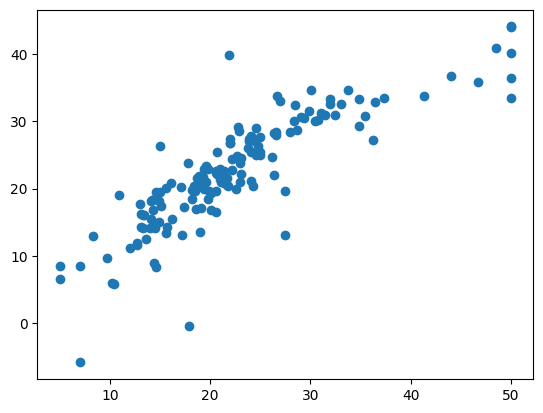

In [36]:
# Scatter plot for predictions
plt.scatter(Y_test, lr_pred)

This plot has almost linear distribution.


In [37]:
# difference
diff = Y_test - lr_pred

In [38]:
diff

365    14.408174
220    -7.022676
502    -1.993498
15      0.323012
229     0.511786
         ...    
246     3.978309
303     0.570582
20      1.103387
348    -2.527204
31     -4.017336
Name: PRICE, Length: 152, dtype: float64

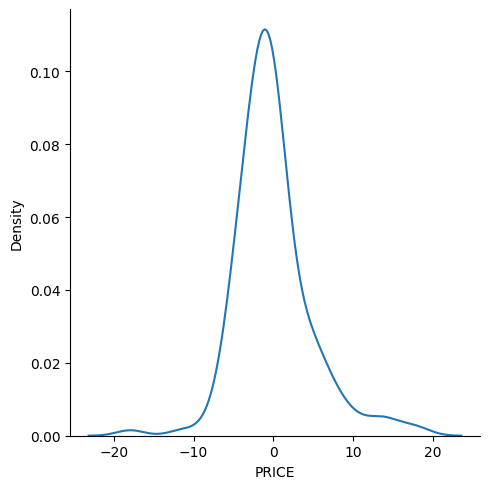

In [39]:
# plot the difference
sns.displot(diff, kind="kde")

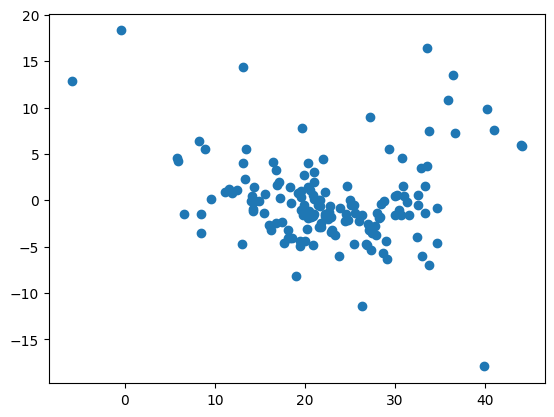

In [40]:
# Scatter plot b/w diff and predictions
plt.scatter(lr_pred, diff)

In [41]:
print(mean_absolute_error(Y_test, lr_pred))
print(mean_squared_error(Y_test, lr_pred))
print(np.sqrt(mean_squared_error(Y_test, lr_pred)))

3.2882616861795033
22.47919114721428
4.741222537195895


### R square and adjusted R square


$$ {\text{Formula: }} $$
$$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} $$
$$ R^2\_{\text{adj}} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right) $$


In [42]:
score = r2_score(Y_test, lr_pred)
print(score)

0.7319691634932157


In [43]:
adjusted_score = 1 - (((1 - score) * (len(Y_test) - 1)) / (len(Y_test) - X_test.shape[1] - 1))

In [44]:
adjusted_score

0.7067198817933013

New Data Prediction


In [45]:
features[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [46]:
scaler.transform([features[0]])

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4220079 ,  0.37654975, -1.33129153, -0.29306922, -0.1642314 ,
         0.41703986, -0.15376489,  0.16541566, -0.99669116, -0.69054403,
        -1.4293091 ,  0.44517194, -1.11010438]])

In [47]:
lr.predict(scaler.transform([features[0]]))

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.9043171])

### Pickling the model


In [48]:
pickle.dump(lr, open('lr_model.pkl', 'wb'))